Ken Furudate

In [ ]:
library(reshape2)
library(ggplot2)

In [ ]:
in_f1 = "Single_cell_proportion_data.txt"      

In [ ]:
set.seed(42)
data <- read.table(in_f1, header=TRUE, sep="\t", quote="", stringsAsFactors = FALSE)
data

,Mst,DC,EC,Mac,Myo,T cell,MSC,MAF,OSCC cell,B cell,CAF,LNM
Sample_IDs,,,,,,,,,,,,
oscc24,0.267606,0.000000,0.014085,0.028169,0.000000,0.014085,0.000000,0.267606,0.183099,0.000000,0.225352,1
oscc18,0.021201,0.000000,0.031802,0.012367,0.001767,0.365724,0.012367,0.000000,0.464664,0.015901,0.074205,1
oscc25,0.018832,0.013183,0.001883,0.001883,0.015066,0.175141,0.030132,0.274953,0.288136,0.000000,0.180791,1
oscc13,0.057471,0.344828,0.034483,0.034483,0.000000,0.172414,0.000000,0.011494,0.172414,0.068966,0.103448,1
oscc5,0.016667,0.000000,0.045833,0.241667,0.000000,0.116667,0.020833,0.008333,0.291667,0.000000,0.258333,1
oscc10,0.011236,0.000000,0.089888,0.000000,0.000000,0.078652,0.000000,0.000000,0.033708,0.494382,0.292135,1
oscc26,0.005076,0.005076,0.000000,0.000000,0.000000,0.015228,0.000000,0.451777,0.309645,0.000000,0.213198,1
oscc6,0.003247,0.000000,0.168831,0.019481,0.000000,0.000000,0.042208,0.006494,0.509740,0.012987,0.237013,1
oscc28,0.000000,0.000000,0.029350,0.002096,0.018868,0.000000,0.098532,0.446541,0.102725,0.000000,0.301887,1


In [ ]:
data.melt <- reshape2::melt(data, 
                            id.vars="LNM", 
                            value.name="Proportion_of_cells_per_sample", 
                            na.rm=TRUE, 
                            stringsAsFactors = FALSE
                            )
data.melt$LNM <- as.character(data.melt$LNM)
head(data.melt)

  LNM variable Proportion_of_cells_per_sample
1   1      Mst                     0.26760563
2   1      Mst                     0.02120141
3   1      Mst                     0.01883239
4   1      Mst                     0.05747126
5   1      Mst                     0.01666667
6   1      Mst                     0.01123596


[1] "OSCC cell"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Proportion_of_cells_per_sample by mat_$LNM
W = 26, p-value = 0.7122
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.3721139  0.3237603
sample estimates:
difference in location 
           -0.05673079 

[1] "CAF"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Proportion_of_cells_per_sample by mat_$LNM
W = 30, p-value = 1
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.1721137  0.1405347
sample estimates:
difference in location 
          -0.006208771 

[1] "MAF"

	Wilcoxon rank sum test with continuity correction

data:  mat_$Proportion_of_cells_per_sample by mat_$LNM
W = 10, p-value = 0.02604
alternative hypothesis: true location shift is not equal to 0
95 percent confidence interval:
 -0.2749857  0.0000000
sample estimates:
difference in location 
          -0.008325316 



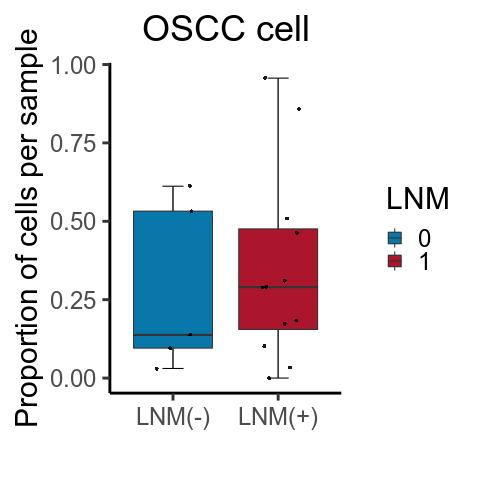

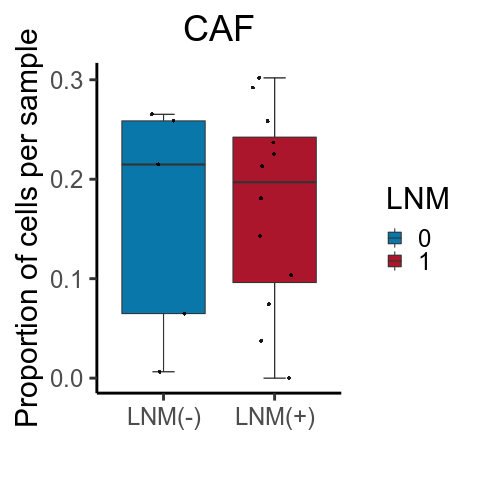

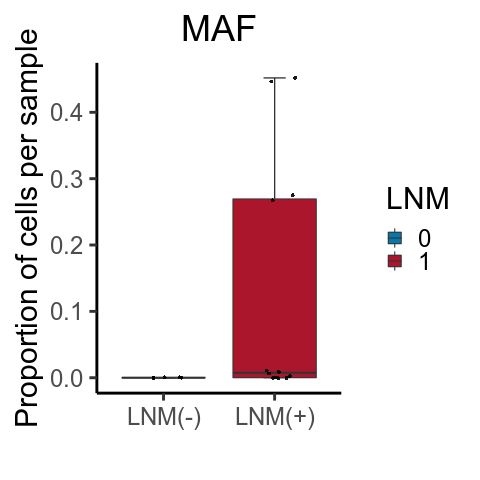

In [ ]:
anot_cols <- c("#0977a9", "#ab162c")
select.col_names <- c("OSCC cell", "CAF", "MAF")

for (i in 1:length(select.col_names)){
	col_ <- select.col_names[i]
	print(col_)
	mat_ <- data.melt[data.melt$variable==col_,]
  ggplot()+theme_set(theme_classic(base_size = 30, base_family = "Arial"))
	p <- ggplot(mat_,
				aes(x=LNM, 
            y=Proportion_of_cells_per_sample), 
				    fill=LNM
            ) +
        stat_boxplot(geom = "errorbar", 
                     width = 0.2
                    ) +
        geom_boxplot(aes(fill=LNM), 
                     outlier.colour=NA, alpha=1.0
                    ) +
        geom_jitter(aes(col=LNM), 
                    position=position_jitter(0.2), 
                    shape=16, 
                    alpha=0.9, 
                    color="Black"
                    ) +
		    labs(title=select.col_names[i], x="", y="Proportion of cells per sample") +
				theme(plot.title = element_text(hjust = 0.5)) +
		    scale_fill_manual(values=anot_cols) +
		    scale_colour_manual(values=anot_cols) +
		    scale_x_discrete(limits=c("0", "1"),
				                labels=c("LNM(-)", "LNM(+)")
                        )
	print(p)

	res_ = wilcox.test(mat_$Proportion_of_cells_per_sample~mat_$LNM,
					  alternative = "two.sided",
					  paired=F,
					  conf.int=T,
					  conf.level=0.95,
					  exact=F
					  )
	print(res_)
}